In [1]:
import numpy as np

In [2]:

def XY(v):
    x,y,z = v
    print(x,y,z)
    return (z*y-x,z*(z*y-x) - y,z)

def YX(v):
    x,y,z = v
    return (z*y-x,z*(z*y-x) - y,z)

def RZRY(v):
    x,y,z = v
    return (x,
            z*x-y,
            -x*(z*x-y) - z )

def RZRX(v):
    x,y,z = v
    return (z*y-x,
            y,
            -y*(z*y-x) - z )

##these two transforamtions are the important ones
##doing RZ  first maps the "fundamental" wedge off
##itself

def RXRZ(v):
    x,y,z = v
    return ( - y*(x*y+z) - x,
            y,
            -x*y-z)

def RYRZ(v):
    x,y,z = v
    return ( x,
             -x*(x*y+z) - y,
            -x*y-z )

## Iteration

 We are interested in the orbit(s) 
 of the lines with gradients:
 
 $(\frac 12 \sqrt (\kappa + 2) \pm \sqrt (\kappa - 2)).$
 
 It's not difficult to find these since RXRZ and RYRZ
 generate a free group so a simple depth first tree "search"
 should work nicely.

The "heavy lifting" is 

In [5]:
_window = 10

def clip(L, box_size=_window):
    ''' clip the points of L to a box of size s x s'''
    L = [np.array(x) for x in L]
    A = [x for x in L if max(abs(x)) < box_size]
    if len(A) == len(L): return L
    a, b = A[-1], L[len(A)]
    #linear interpolation
    pt = a + (b-a)*(box_size - max(abs(a)))/(max(abs(b)) - max(abs(a)))
    A.append(pt)
    return A


class IterTree(object):
    #this is a list of lists one at each depth in the tree
    def __init__(self):
        self.lines = [ [] for i in range(10) ]
    
    def make(self, W,d):
        W = clip(W)
        if len(W) < 50:
            #barycentric subdivision
            tt = [W[0]]
            for a,b in zip(W, W[1:]):
                tt.extend([.5*(a+b),b])
            W = tt
        self.lines[d].append(W)
        if d >0:
            self.make([RYRZ(v) for v in W], d-1)
            self.make([RXRZ(v) for v in W], d-1) 
        return
    

In [11]:
def makeFig(K, depth=5):
    iterations  = IterTree()
    
    # should be obvious from the paper what these are
    Z = np.sqrt(K+2)
    m1 = .5*( np.sqrt(K+2)- np.sqrt(K-2) )
    m2 = .5*( np.sqrt(K+2) + np.sqrt(K-2) )

    #these are the initial lines
    L1 = [(t ,m1*t,Z) for t in np.linspace(0,_window,200)]
    L2 = [(t ,m2*t,Z) for t in np.linspace(0,_window,200)]
    
    #iterate the maps and find the orbit of L1
    iterations.make(L1,depth)
    
    #tack on L2 in the same layer as L1 for printing
    L2 = clip(L2)
    iterations.lines[depth].append(L2)
    return iterations

In [67]:
dd = makeFig(KK, depth=7)

for k, vv in enumerate(dd.lines):
    print("depth %d, number of curves %d"%(5-k, len(vv)) ) 

depth 5, number of curves 128
depth 4, number of curves 64
depth 3, number of curves 32
depth 2, number of curves 16
depth 1, number of curves 8
depth 0, number of curves 4
depth -1, number of curves 2
depth -2, number of curves 2
depth -3, number of curves 0
depth -4, number of curves 0


In [10]:
import matplotlib.pyplot as plt

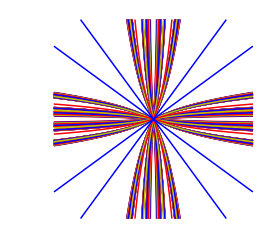

In [69]:

#dd = makeFig(KK, depth=)
styles = ['r','b','y']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect(1) 
ax.axis('off')
for k, layer in enumerate(dd.lines):
    sty = styles[k%3]
    for vv in layer:
        X,Y,Z = zip(* vv)
        X = np.array(X)
        Y = np.array(Y)
        ax.plot(X,Y, sty)
        ax.plot(X,-Y, sty)
        ax.plot(-X,Y, sty)
        ax.plot( -X,-Y, sty)

#plt.axes().set_aspect('equal')

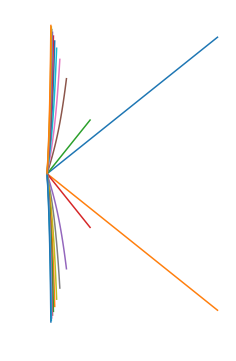

In [37]:
K = 2.2
Z = np.sqrt(K+2)
m1 = .5*( np.sqrt(K+2)- np.sqrt(K-2) )

def XY(v):
    x,y,z = v
  
    return (z*y-x,z*(z*y-x) - y,z)


L1 = [(t ,m1*t,Z) for t in np.linspace(0,_window,200)]

lines = [L1]
for j in range(10):
    U = [RZRY(v) for v in  lines[-1] ]
    U = clip(U)
    lines.append(U)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
ax.axis('off')

for vv in lines:
    X,Y,Z = zip(* vv)
    X = np.array(X)
    Y = np.array(Y)
    ax.plot(X,Y)
    ax.plot(X,-Y)


In [29]:
len(lines)

5